In [56]:
# Detalle de alumno:
# Nombre: Luis David Paredes Capcha
# Ruta GIT: https://github.com/LuisDavidParedesCapcha/MLE/tree/main/MLE_DMC_Trabajos


In [32]:
import pandas as pd
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pointbiserialr

In [16]:
df = pd.read_csv('D:/Archivos - Visual Studio Code - Python/Bases de datos/taller2_mle.csv')

In [ ]:
# Pregunta 1. 
# Porcentaje de clientes que cerraron su cuenta:
print("El porcentaje de clientes que cerraron su cuenta es del : ",df["cerrara_cuenta"][df["cerrara_cuenta"]==1].count()/df["cerrara_cuenta"].count()*100,"%")

El porcentaje de clientes que cerraron su cuenta es del :  14.04 %


In [29]:
# Pregunta 1.
# El target está desbalanceado: hay muy poca cantidad de sujetos que se van, a comparación de los que no se van.
df["cerrara_cuenta"].value_counts()

cerrara_cuenta
0    4298
1     702
Name: count, dtype: int64

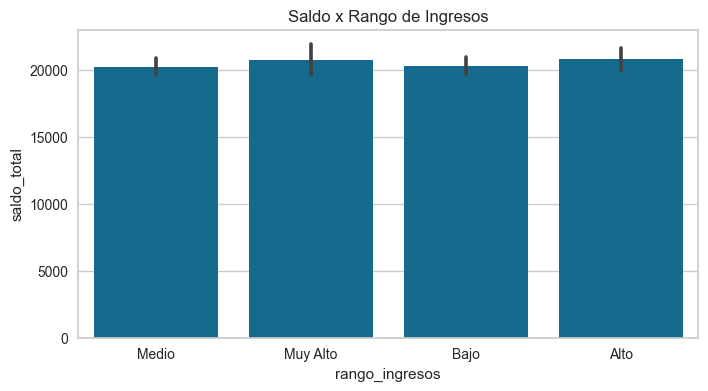

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='rango_ingresos', y='saldo_total')
plt.title("Saldo x Rango de Ingresos")
plt.show()

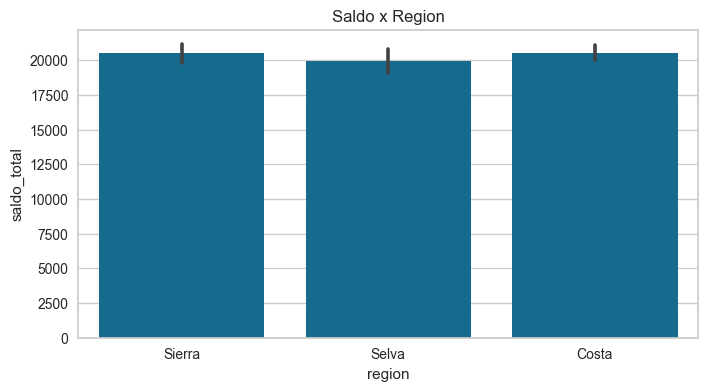

In [20]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='region', y='saldo_total')
plt.title("Saldo x Region")
plt.show()

In [ ]:
# Pregunta 2
# Correlaciones con el Target
# La variable con mayor relación es con la variable "satisfaccion_encuesta", la relación es inversa.
# Cuando hay mayor puntuación en satisfacción_encuesta es más probable que no cierre su cuenta.

target = 'cerrara_cuenta'
exclude_cols = ['segmento', 'region', 'rango_ingresos', target]

for col in df.columns.drop(exclude_cols):
    # Correlación de Pearson
    pearson_corr = df[target].corr(df[col])
    print(f"Pearson ({target} vs {col}): {pearson_corr:.4f}")


Pearson (cerrara_cuenta vs edad): 0.0087
Pearson (cerrara_cuenta vs saldo_total): -0.0330
Pearson (cerrara_cuenta vs numero_productos): -0.0391
Pearson (cerrara_cuenta vs visitas_app_mes): 0.0123
Pearson (cerrara_cuenta vs usa_web): -0.0046
Pearson (cerrara_cuenta vs usa_tarjeta_credito): 0.0226
Pearson (cerrara_cuenta vs reclamos_6m): 0.0244
Pearson (cerrara_cuenta vs satisfaccion_encuesta): -0.1397
Pearson (cerrara_cuenta vs tasa_credito_personal): -0.0199


In [35]:
df.head(15)
# Las variables como usa_web y usa_tarjeta_credito, las dejo porque ya son dummies

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
0,48,Preferente,43791.80,5,11,0,1,1,4.2,36.82,Medio,Sierra,0
1,36,Estándar,17940.87,1,7,0,1,0,2.2,39.78,Muy_Alto,Selva,0
2,48,Estándar,9308.09,4,3,0,1,1,1.0,28.36,Medio,Sierra,1
3,30,Estándar,709.76,5,5,1,1,0,5.0,45.73,Bajo,Selva,0
4,74,Preferente,20471.46,1,4,0,0,1,3.1,39.19,Medio,Sierra,0
5,21,Estándar,15613.91,1,9,0,0,2,1.2,33.96,Bajo,Costa,0
6,37,Premium,34962.63,4,6,0,0,0,3.6,45.23,Medio,Costa,0
7,30,Estándar,43665.24,2,10,1,1,1,1.7,44.72,Alto,Sierra,0
8,50,Preferente,27531.47,1,14,1,1,1,4.1,35.62,Bajo,Costa,0
9,40,Estándar,23910.59,4,6,0,0,1,4.7,35.51,Bajo,Costa,0


In [23]:
df['rango_ingresos'][df["rango_ingresos"]=="Muy Alto"] = "Muy_Alto"

In [25]:
# 4. PyCaret: setup con técnicas avanzadas
clf = setup(data=df,
            target='cerrara_cuenta',
            session_id=123,
            categorical_features=['segmento', 'region','rango_ingresos'],
            normalize=True,
            feature_selection=True,
            #ignore_features=['rango_ingresos'],  # lo reemplazamos por la versión binned
            remove_multicollinearity=True,
            transformation=True,
            transformation_method='yeo-johnson')

,Description,Value
0,Session id,123
1,Target,cerrara_cuenta
2,Target type,Binary
3,Original data shape,"(5000, 13)"
4,Transformed data shape,"(5000, 3)"
5,Transformed train set shape,"(3500, 3)"
6,Transformed test set shape,"(1500, 3)"
7,Numeric features,9
8,Categorical features,3
9,Preprocess,True


In [ ]:
# Pregunta 3
# El mejor modelo considerando AUC es: SVM - Linear Kernel
# El mejor modelo considerando Recall es: Decision Tree Classifier

best = compare_models(sort='Recall')
# He considerado al Recall como mejor métrica
# El motivo es porque se debe de minimizar la pérdica de clientes valiosos

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7511,0.4937,0.1383,0.1335,0.1348,-0.0094,-0.0094,0.1450
et,Extra Trees Classifier,0.8263,0.4901,0.0611,0.1759,0.0895,0.0169,0.0209,0.2320
rf,Random Forest Classifier,0.8363,0.4737,0.0366,0.1605,0.0589,0.0052,0.0082,0.2710
knn,K Neighbors Classifier,0.8411,0.4974,0.0244,0.1410,0.0410,-0.0017,-0.0014,0.1540
lightgbm,Light Gradient Boosting Machine,0.8514,0.4838,0.0102,0.1183,0.0187,-0.0019,-0.0050,0.2340
lr,Logistic Regression,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.6490
nb,Naive Bayes,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.1440
svm,SVM - Linear Kernel,0.8597,0.5331,0.0000,0.0000,0.0000,0.0000,0.0000,0.1330
ridge,Ridge Classifier,0.8597,0.5221,0.0000,0.0000,0.0000,0.0000,0.0000,0.1270
qda,Quadratic Discriminant Analysis,0.8597,0.5205,0.0000,0.0000,0.0000,0.0000,0.0000,0.1200


In [ ]:
# 6. Ajustando hiperparámetros
final = tune_model(best, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.5253,0.0408,0.1333,0.0625,-0.0033,-0.0041
1,0.8314,0.4689,0.0204,0.0833,0.0328,-0.0236,-0.0308
2,0.8457,0.4818,0.0204,0.1429,0.0357,0.0007,0.0012
3,0.8429,0.4662,0.0000,0.0000,0.0000,-0.0315,-0.0533
4,0.8171,0.4840,0.0204,0.0588,0.0303,-0.0451,-0.0529
5,0.8314,0.5227,0.0204,0.0833,0.0328,-0.0236,-0.0308
6,0.8371,0.4585,0.0204,0.1000,0.0339,-0.0142,-0.0198
7,0.8457,0.5380,0.0000,0.0000,0.0000,-0.0266,-0.0486
8,0.8286,0.4805,0.0204,0.0769,0.0323,-0.0281,-0.0357


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


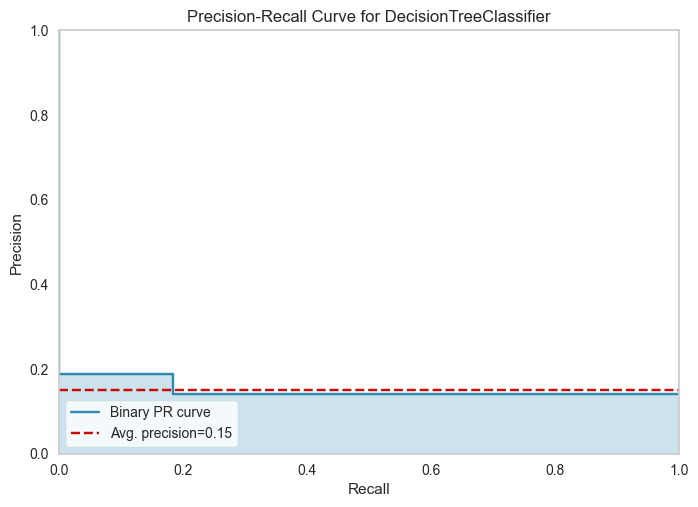

In [39]:
plot_model(final, plot='pr')  # Precision-Recall

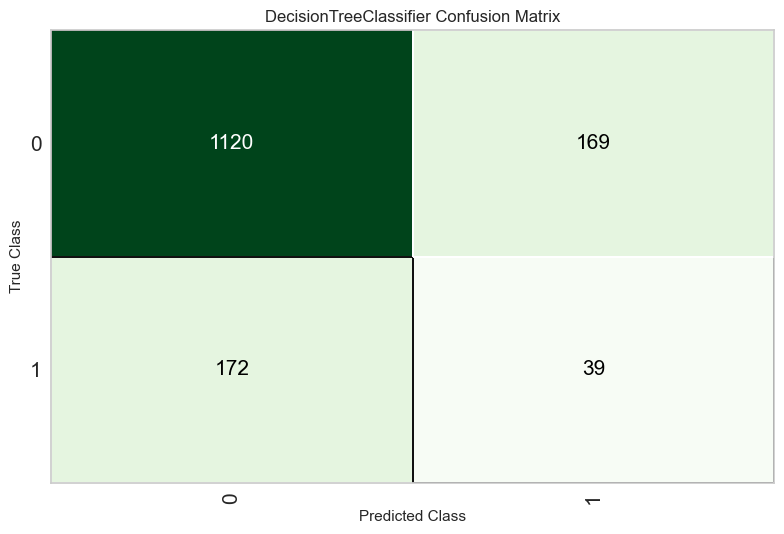

In [40]:
plot_model(final, plot='confusion_matrix')

In [ ]:
# Pregunta 5
# Si el cliente predice como FALSO POSITVO:
# El banco llamaría al cliente para corroborar su salida, así que hay la posibilidad de asegurarnos de que se fue o no se fue.


# Si el cliente predico como FALSO NEGATIVO:
# El banco no llamaría porque no sabría que el cliente se fue, así que este problema tipo II es más peligroso que el falso positivo.

In [ ]:
evaluate_model(final)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

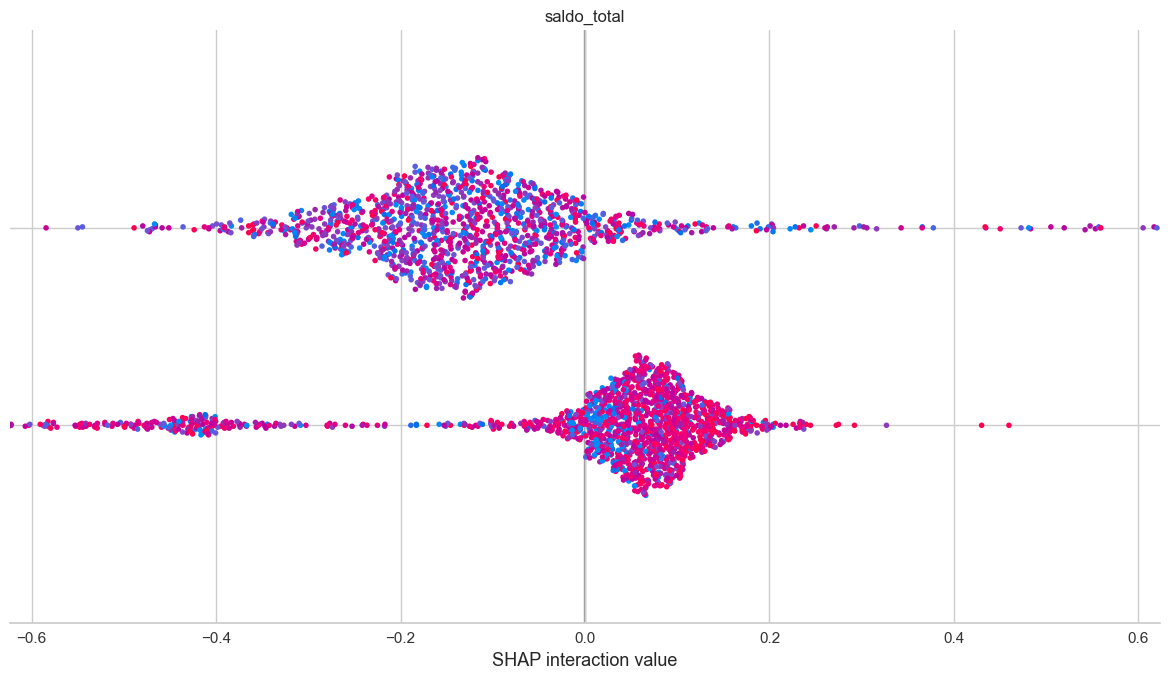

In [ ]:
#Interpretabilidad con SHAP
interpret_model(final, plot= 'summary')

In [ ]:
# Pregunta 7
# A pesar de haber sido cliente Premium y tener saldo muy elevados, decidieron marcharse 
# Esto podría ser debido a que el rango_ingresos ha sido Bajo y porque la tasa_credito_personal fue relativamente alto
df[(df["segmento"] == "Premium") & 
   (df["cerrara_cuenta"]==1)].sort_values(by ="saldo_total", ascending = False).head(5)

,edad,segmento,saldo_total,numero_productos,visitas_app_mes,usa_web,usa_tarjeta_credito,reclamos_6m,satisfaccion_encuesta,tasa_credito_personal,rango_ingresos,region,cerrara_cuenta
3732,28,Premium,61476.11,3,7,1,1,0,2.0,43.44,Bajo,Costa,1
4036,64,Premium,46754.26,5,3,1,1,0,4.0,43.10,Medio,Costa,1
1469,38,Premium,45292.85,3,6,1,0,0,4.1,39.46,Medio,Costa,1
4112,42,Premium,37439.27,1,8,1,1,0,3.5,45.28,Medio,Selva,1
403,26,Premium,36875.28,2,5,1,1,1,2.8,28.18,Alto,Costa,1


In [ ]:
# Pregunta 8
# Sí, debería de incluirlo, ya que también es una variable que influye en la decisión que toma el cliente al momento de mantenerse o dejar.
# En casi cambie la tasa, entonces se debería de reajustar el modelo nuevamente.

In [ ]:
# Preguta 9:
# Explicaría la importancia del modelo, y cómo es el poder predictivo que tiene. Es así como podría perdurar el modelo
# Teniendo objetivos claros, y aplicando los principios de MLOps para que siga siendo útil.